In [1]:
import pandas as pd
df = pd.read_csv('Meteorite_Landings.csv')
fallen = df[df['fall'] == 'Fell']
fallen

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...,...
1106,Zhuanghe,30408,Valid,H5,2900.0,Fell,1976.0,39.66667,122.98333,"(39.66667, 122.98333)"
1107,Zmenj,30411,Valid,Howardite,246.0,Fell,1858.0,51.83333,26.83333,"(51.83333, 26.83333)"
1108,Zomba,30412,Valid,L6,7500.0,Fell,1899.0,-15.18333,35.28333,"(-15.18333, 35.28333)"
1109,Zsadany,30413,Valid,H5,552.0,Fell,1875.0,46.93333,21.50000,"(46.93333, 21.5)"


In [6]:
desc = fallen.describe()
desc

,id,mass (g),year,reclat,reclong
count,1107.000000,1.075000e+03,1107.000000,1097.000000,1097.000000
mean,16447.357724,4.707072e+04,1911.235772,30.043853,20.134376
std,10462.561313,7.170671e+05,83.832291,23.126581,68.866693
min,1.000000,1.000000e-01,860.000000,-44.116670,-157.866670
25%,10083.500000,6.860000e+02,1874.500000,21.866670,-4.233330
50%,15426.000000,2.800000e+03,1924.000000,36.100000,18.716670
75%,23101.500000,1.045000e+04,1964.000000,46.066670,76.266670
max,57168.000000,2.300000e+07,2013.000000,66.348330,174.400000


In [11]:
fallen.values[0]

array(['Aachen', 1, 'Valid', 'L5', 21.0, 'Fell', 1880.0, 50.775, 6.08333,
       '(50.775, 6.08333)'], dtype=object)

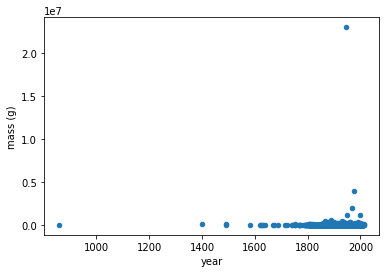

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

fallen.plot(x='year',y='mass (g)', kind='scatter')
plt.show()

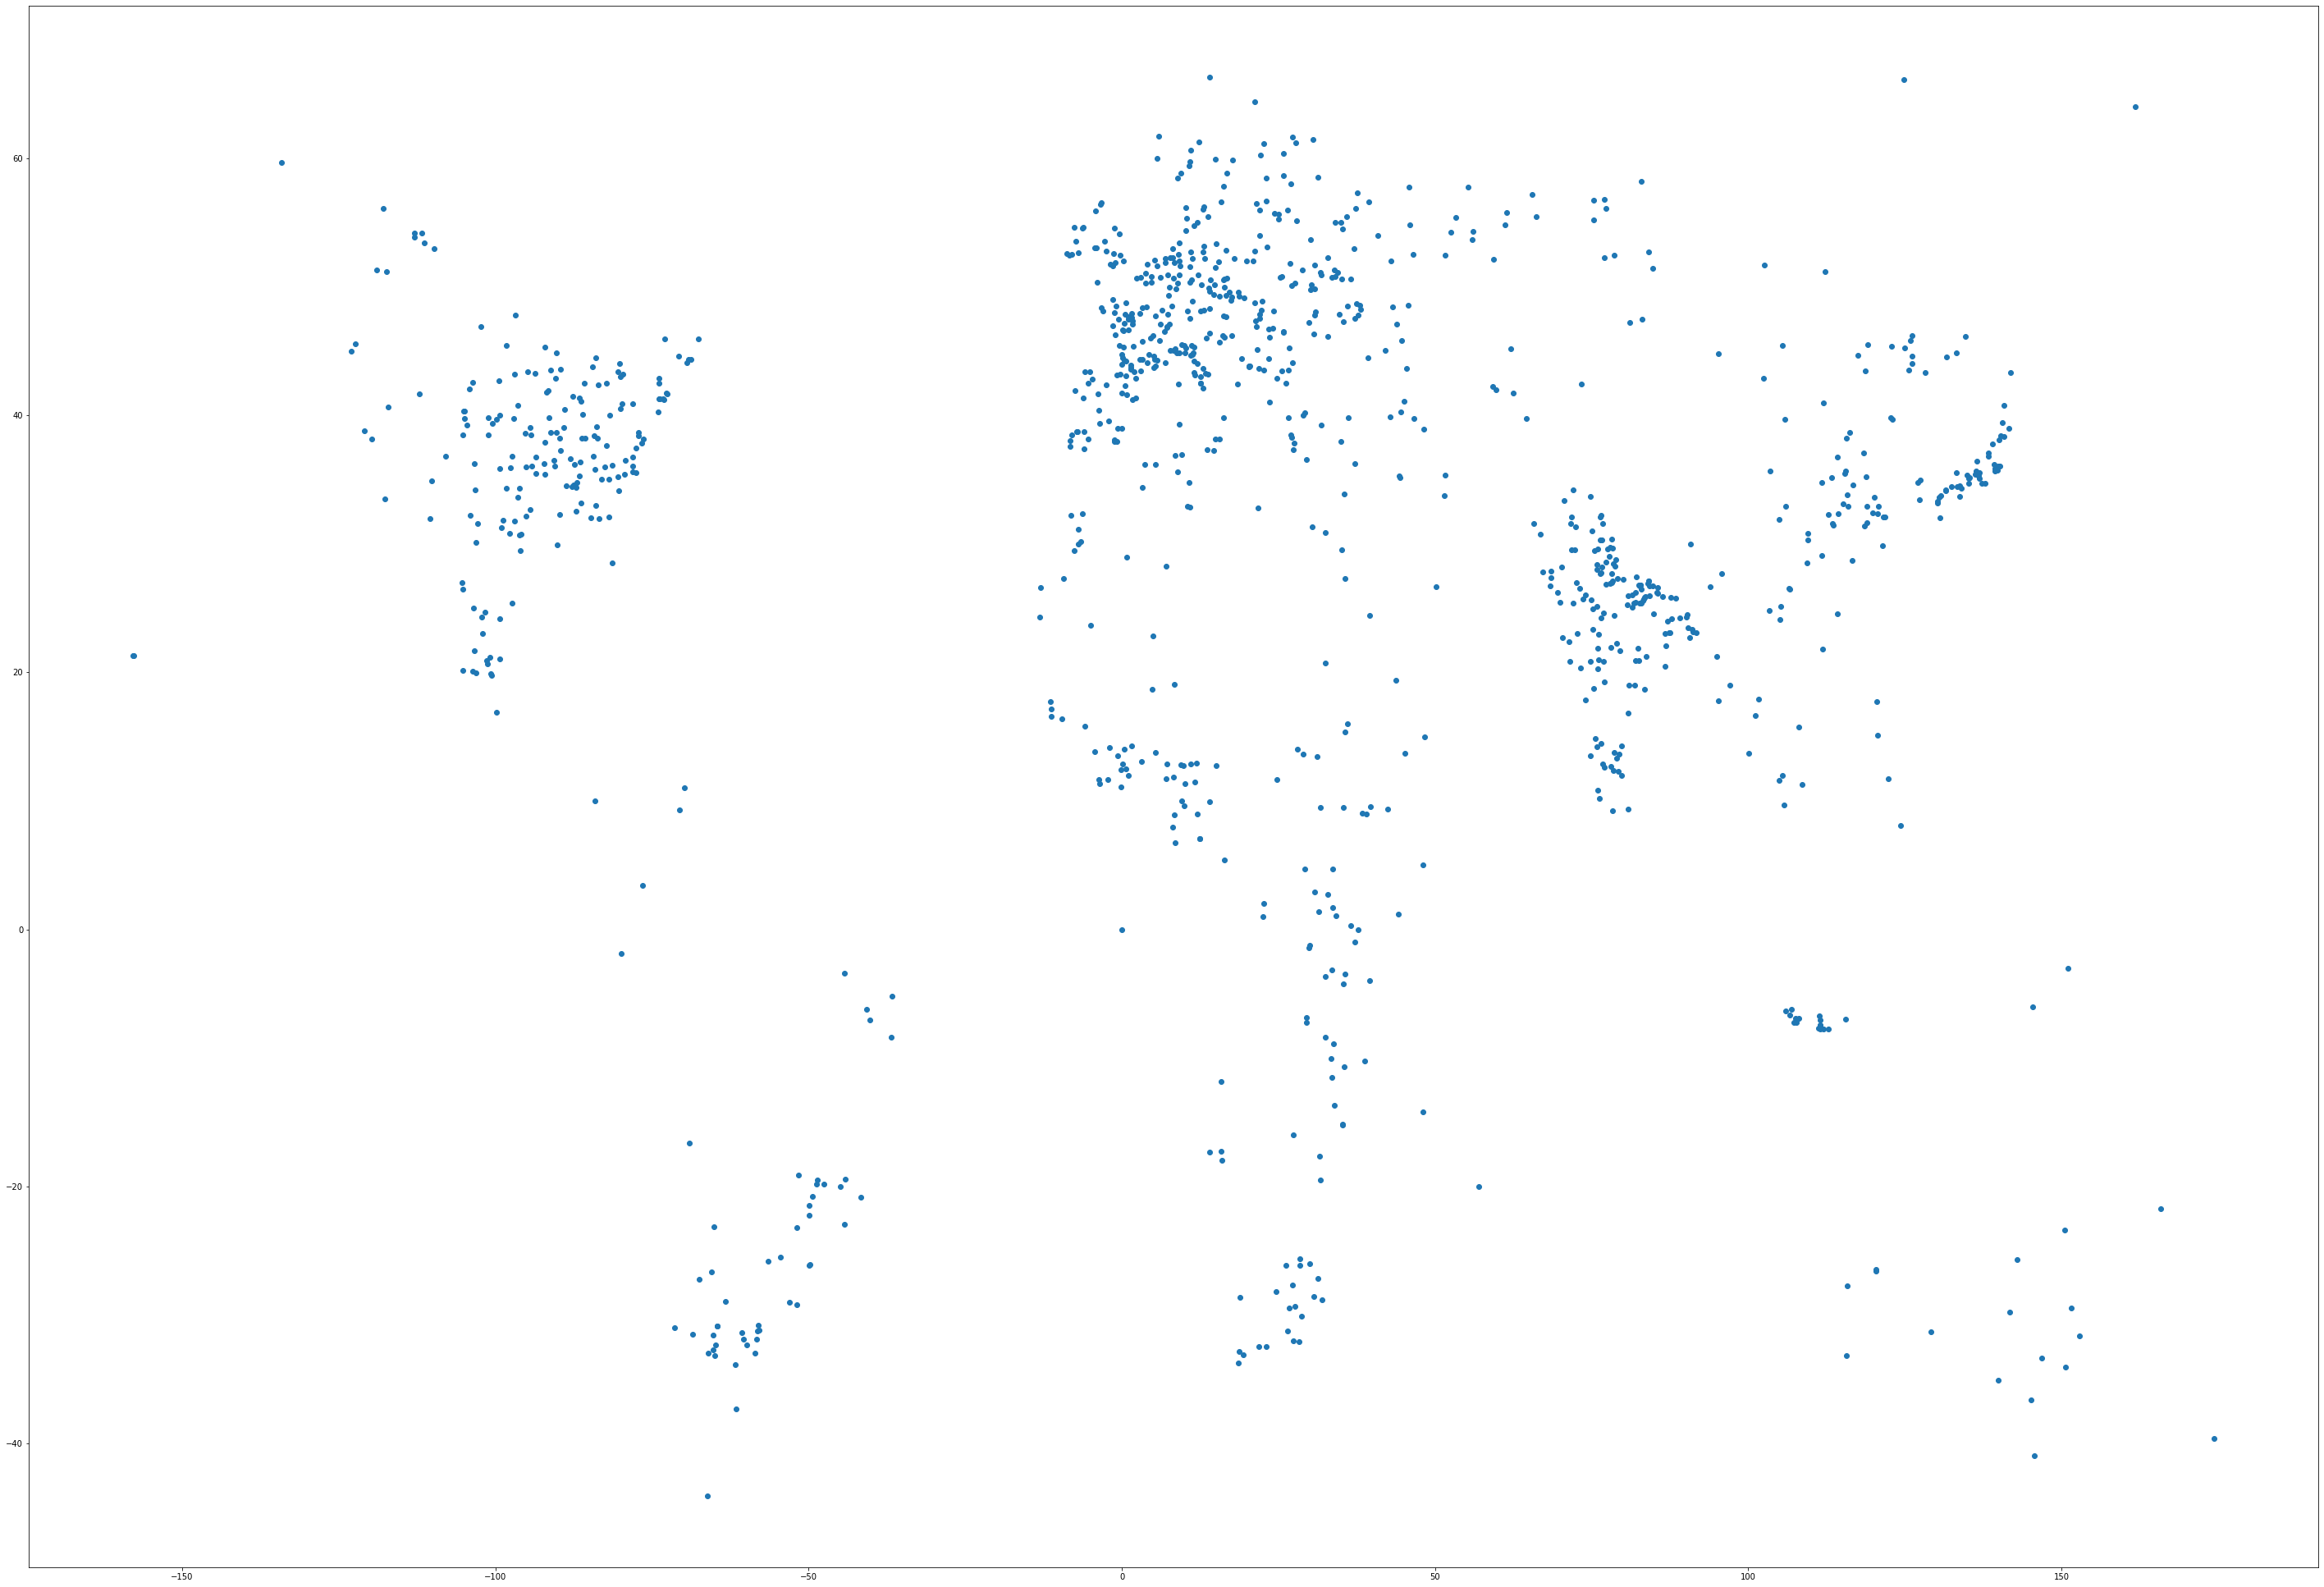

In [8]:
plt.scatter(x=fallen['reclong'], y=fallen['reclat'])
plt.rcParams["figure.figsize"] = (500,350)
plt.show()